# Statistics Final Project Machine Learning Model

## Preparing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
        titleweight='bold',titlesize=18,titlepad=10)

# Imports
source = lambda x : f'../../star_dataset/{x}'

X_full = pd.read_csv(source('Star39552_balanced.csv'))
X_full.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


Selecting target and predictor variables to be 'Amag' and 'B-V'

In [2]:
from sklearn.model_selection import train_test_split

X_cols = ['Amag', 'B-V']
y_cols = ['TargetClass']

# print(list(set(X_full.columns) - set(X_cols + y_cols)))

X_full.dropna(axis=0, subset=['TargetClass'], inplace=True) # drop missing values
X_full.drop(list(set(X_full.columns) - set(X_cols)), axis=1, inplace=True)
# samples = [X_full.sample(n=1000, random_state=i) for i in range(10)]
y_full = X_full[y_cols]

X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.5, test_size=0.5, random_state = 100)

In [3]:
print(X_train.head())
print(X_valid.head())
print(X_train.shape)
print(X_valid.shape)

         B-V       Amag
32202 -0.067  17.440240
14702  0.846  16.112220
16507 -0.020  14.292269
32717  0.456  18.251144
28014  0.554  14.056757
         B-V       Amag
2438   0.331  17.863170
20570  0.481  18.138397
18388  1.563  13.793582
11136  1.747  15.034814
37525  1.352  14.257706
(19776, 2)
(19776, 2)


## RandomForest Machine Learning Model

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=1, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_valid)
print(f"MSE: {mean_squared_error(y_pred, y_valid)}")

MSE: 0.18512338187702265


/tmp/ipykernel_14648/1218607737.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [5]:
print(y_pred)

[1. 1. 0. ... 0. 0. 0.]


In [6]:
print(y_valid)

       TargetClass
2438             0
20570            1
18388            0
11136            0
37525            0
...            ...
20709            0
22604            1
2064             0
3987             0
20421            0

[19776 rows x 1 columns]


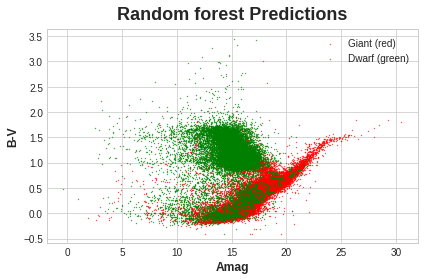

In [7]:
target = 'TargetClass'
x_var = 'Amag'
y_var = 'B-V'

rf_pred = rf_model.predict(X_full)

def create_plot(x_var, y_var, pred, title):
    x_giant = X_full[pred == 1][x_var]
    y_giant = X_full[pred == 1][y_var]
    x_dwarf = X_full[pred == 0][x_var]
    y_dwarf = X_full[pred == 0][y_var]
    plt.scatter(x_giant, y_giant, s=0.1, color='red', label="Giant (red)")
    plt.scatter(x_dwarf, y_dwarf, s=0.1, color='green', label="Dwarf (green)")
    plt.legend()
    plt.title(title)
    plt.ylabel(y_var)
    plt.xlabel(x_var)

create_plot(x_var, y_var, rf_pred, "Random forest Predictions")

In [8]:
from sklearn.metrics import confusion_matrix
print("Using all data points")
print(confusion_matrix(y_full, rf_pred, labels=[0,1]))
print("Using validation data points")
print(confusion_matrix(y_valid, y_pred, labels=[0, 1]))

Using all data points
[[17208  2568]
 [ 2414 17362]]
Using validation data points
[[8059 1875]
 [1786 8056]]


## Neural Network Deep Learning Model

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (X_train.shape[1],)

nn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

2022-01-15 11:15:48.852039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-15 11:15:48.852061: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-15 11:15:49.731397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 11:15:49.731806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-15 11:15:49.731866: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

In [10]:
nn_model.compile(
    optimizer='adam',
    loss='mse',
)

history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
155/155 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1071
Epoch 2/200
155/155 [==============================] - 0s 1ms/step - loss: 0.1039 - val_loss: 0.1060
Epoch 3/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0998 - val_loss: 0.1021
Epoch 4/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0971 - val_loss: 0.1085
Epoch 5/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0990 - val_loss: 0.0992
Epoch 6/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0961 - val_loss: 0.1002
Epoch 7/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0963 - val_loss: 0.0979
Epoch 8/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0954 - val_loss: 0.0988
Epoch 9/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0961 - val_loss: 0.0968
Epoch 10/200
155/155 [==============================] - 0s 1ms/step - loss: 0.0944 - val_lo

<AxesSubplot:>

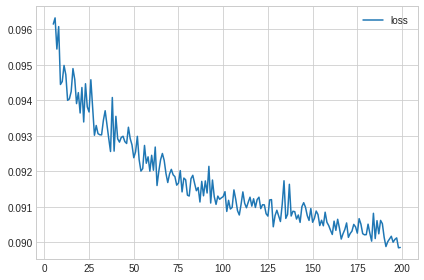

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()

In [12]:
y_pred = nn_model.predict(X_valid)
# Rounding values off
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0


In [13]:
confusion_matrix(y_valid, y_pred, labels=[0, 1])

array([[8439, 1495],
       [ 935, 8907]])

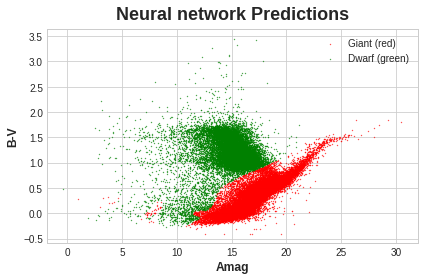

In [14]:
x_var = 'Amag'
y_var = 'B-V'

nn_pred = nn_model.predict(X_full)
# Rounding the predictions
nn_pred[nn_pred >= 0.5] = 1
nn_pred[nn_pred < 0.5] = 0
create_plot(x_var, y_var, nn_pred, "Neural network Predictions")

In [15]:
print("Using all data points")
print(confusion_matrix(y_full, nn_pred, labels=[0,1]))
print("Using validation data points")
print(confusion_matrix(y_valid, y_pred, labels=[0, 1]))

Using all data points
[[16859  2917]
 [ 1809 17967]]
Using validation data points
[[8439 1495]
 [ 935 8907]]


In [16]:
print(confusion_matrix(rf_pred, nn_pred, labels=[0,1]))

[[16760  2862]
 [ 1908 18022]]


## Testing whether the two models are the same

In [76]:
N = 100 # number of samples
n = 1_000 # size of each sample

# 1. Get 10 different random samples
y_samples = [y_full.sample(n=n, random_state=i) for i in range(N)]
X_samples = [X_full.sample(n=n, random_state=i) for i in range(N)]

In [77]:
rf_results = []
nn_results = []

for X, y in zip(X_samples, y_samples):
    rf_pred = rf_model.predict(X)
    nn_pred = nn_model.predict(X)

    # rounding required for neural network predictions
    nn_pred[nn_pred >= 0.5] = 1
    nn_pred[nn_pred < 0.5] = 0

    # collecting results
    rf_results.append(
        mean_squared_error(y, rf_pred)
    )
    nn_results.append(
        mean_squared_error(y, nn_pred)
    )

In [73]:
print(rf_results)
print(nn_results)

[0.1254, 0.1256, 0.1274, 0.1232, 0.1263, 0.1279, 0.127, 0.1286, 0.1212, 0.1271]
[0.1204, 0.1201, 0.1197, 0.1198, 0.1209, 0.1183, 0.1217, 0.1196, 0.1234, 0.1173]


In [78]:
import statistics as st
rf_sample_mean = st.mean(rf_results)
nn_sample_mean = st.mean(nn_results)
print(f"{rf_sample_mean = }")
print(f"{nn_sample_mean = }")
overall_mean = st.mean([rf_sample_mean, nn_sample_mean])
print(f"{overall_mean = }")
SSR = N * sum([(m - overall_mean) ** 2 for m in [rf_sample_mean, nn_sample_mean]])
print(f"{SSR = }")
rf_SSE = sum((i - rf_sample_mean) ** 2 for i in rf_results)
nn_SSE = sum((i - nn_sample_mean) ** 2 for i in nn_results)
SSE = rf_SSE + nn_SSE
SST = SSE + SSR
print(f"{rf_SSE = }")
print(f"{nn_SSE = }")
print(f"{SSE = }")
print(f"{SST = }")

# calculating the f-value
k = 2 # number of models
df_treatment = k - 1
df_error = N * k - k
print(f"{df_treatment = }")
print(f"{df_error = }")
ms_treatment = SSR / df_treatment
ms_error = SSE / df_error
f_value = ms_treatment / ms_error
print(f"{f_value = }")

rf_sample_mean = 0.12583
nn_sample_mean = 0.11865
overall_mean = 0.12224
SSR = 0.002577619999999994
rf_SSE = 0.013214110000000001
nn_SSE = 0.00898675
SSE = 0.022200860000000003
SST = 0.02477848
df_treatment = 1
df_error = 198
f_value = 22.988693230802713


In [79]:
from scipy.stats import f_oneway
f_value, p_value = f_oneway(rf_results, nn_results)
print(f"{f_value = }")
print(f"{p_value = }")

f_value = 22.988693230802767
p_value = 3.1964619978043483e-06


In [52]:
A = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
B = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
C = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]
print(f_oneway(A, B, C))

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)


In [59]:
A_mean = st.mean(A)
B_mean = st.mean(B)
C_mean = st.mean(C)
print(f"{A_mean = }")
print(f"{B_mean = }")
print(f"{C_mean = }")
overall_mean = st.mean([A_mean, B_mean, C_mean])
print(f"{overall_mean = }")
SSR = N * sum([(m - overall_mean) ** 2 for m in [A_mean, B_mean, C_mean]])
print(f"{SSR = }")
A_SSE = sum((i - A_mean) ** 2 for i in A)
B_SSE = sum((i - B_mean) ** 2 for i in B)
C_SSE = sum((i - C_mean) ** 2 for i in C)
SSE = A_SSE + B_SSE + C_SSE
SST = SSE + SSR
print(f"{A_SSE = }")
print(f"{B_SSE = }")
print(f"{C_SSE = }")
print(f"{SSE = }")
print(f"{SST = }")

# calculating the f-value
k = 3 # number of models
df_treatment = k - 1
df_error = 10 * k - k
print(f"{df_treatment = }")
print(f"{df_error = }")
ms_treatment = SST / df_treatment
ms_error = SSE / df_error
f_value = ms_treatment / ms_error
print(f"{ms_error = }")
print(f"{ms_treatment = }")
print(f"{f_value = }")

A_mean = 83.4
B_mean = 89.3
C_mean = 84.7
overall_mean = 85.8
SSR = 192.19999999999945
A_SSE = 640.4000000000001
B_SSE = 208.10000000000002
C_SSE = 252.10000000000002
SSE = 1100.6000000000001
SST = 1292.7999999999995
df_treatment = 2
df_error = 27
ms_error = 40.762962962962966
ms_treatment = 646.3999999999997
f_value = 15.857532255133556
